In [9]:
from stardist.models import StarDist2D
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [10]:
model = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [17]:
img = tifffile.imread("data/CTRL_1_M1_3R_ 0004.tif.ome.tif")
img_rgb = np.moveaxis(img, 0, -1)
print(img_rgb.shape)

(1920, 2560, 3)


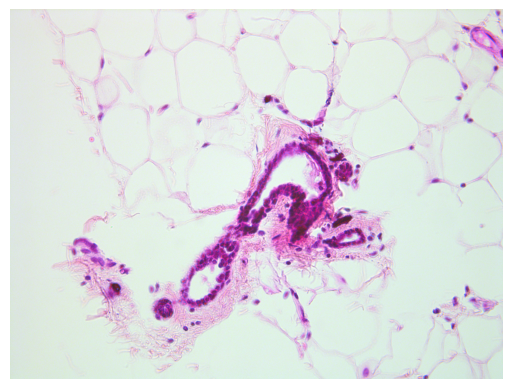

In [12]:
fig, ax = plt.subplots()
ax.axis(False)
ax.imshow(img_rgb)

In [13]:
from csbdeep.utils import normalize

In [18]:
labels, _ = model.predict_instances(normalize(img_rgb))

In [19]:
from stardist.plot import render_label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9767441749572754..1.0000000238418578].


Text(0.5, 1.0, 'prediction + input overlay')

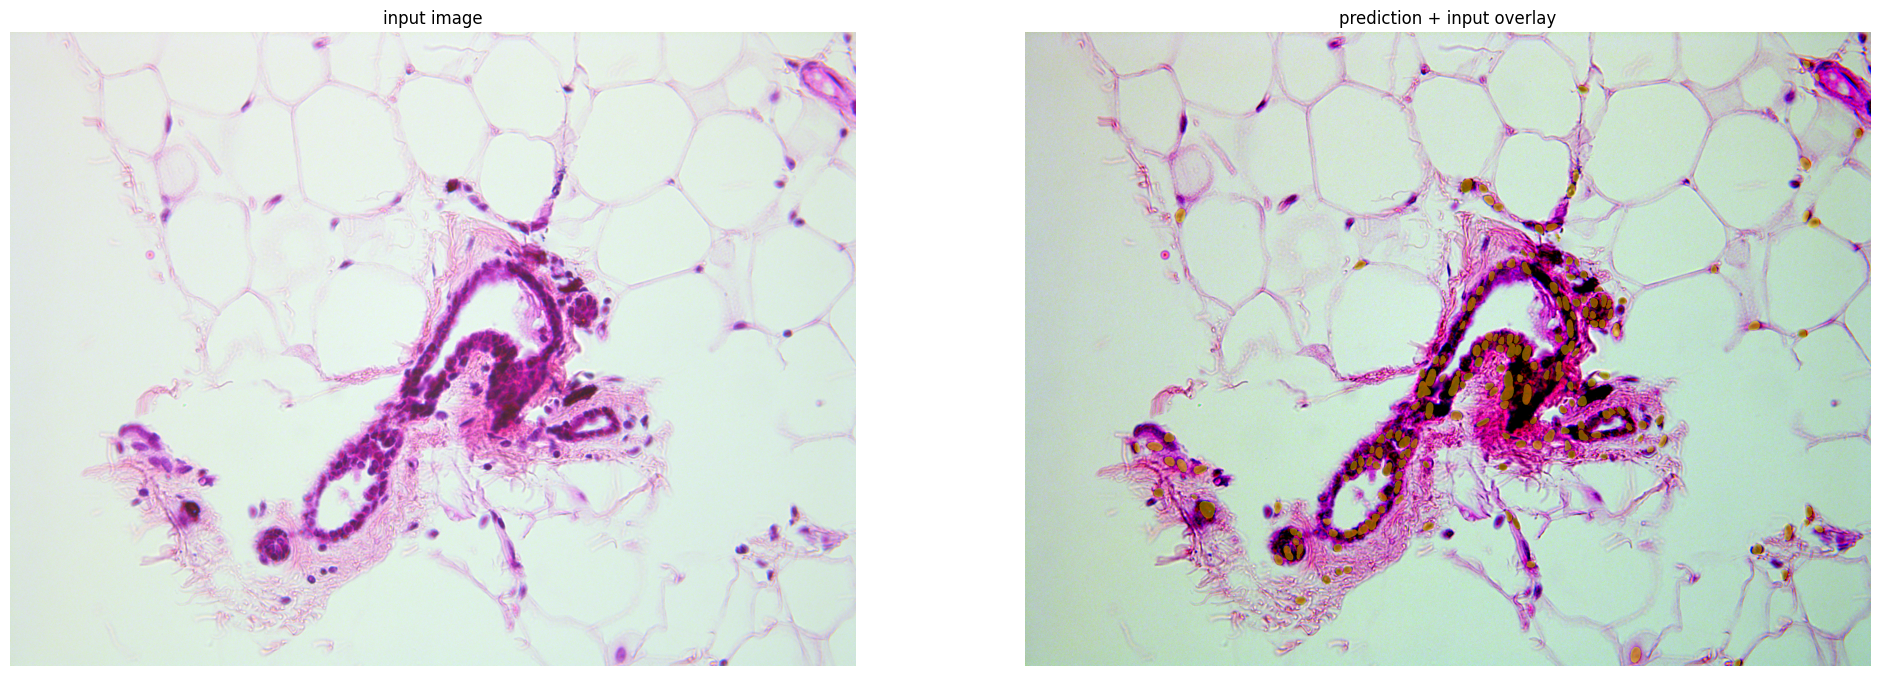

In [26]:
plt.figure(figsize=(24, 12))

plt.subplot(1,2,1)
plt.imshow(img_rgb, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img_rgb, cmap=(1.0, 1.0, 0), alpha=0.6))
plt.axis("off")
plt.title("prediction + input overlay")